Simple embedding example using Theano. It demonstrates that embeddings(embedding w1 * embedding w2) concludes 
the silimar point through cost minimization function.

In [1]:
import theano
import numpy as np
import theano.tensor as T
import random
import matplotlib.pyplot as plt
import pylab as p

%matplotlib inline

E = np.asarray(np.random.randn(6, 2))
t_E = theano.shared(E)

In [2]:
t_idxs = T.ivector()

In [3]:
t_embedding_output = t_E[t_idxs]
t_dot_product = T.dot(t_embedding_output[0], t_embedding_output[1])

In [4]:
t_label = T.iscalar()
gradient = T.grad(cost=abs(t_label - t_dot_product), wrt=t_E)
updates = [(t_E, t_E - 0.01 * gradient)]
train = theano.function(inputs=[t_idxs, t_label], outputs=[], updates=updates)

In [5]:
summary0 = []
summary1 = []
summary2 = []
summary3 = []
summary4 = []
summary5 = []

print "i n d0 d1"
for i in range(0, 10000):
    v1, v2 = random.randint(0, 5), random.randint(0, 5)
    label = 1.0 if (v1/2 == v2/2) else 0.0
    train([v1, v2], label)
    if i % 100 == 0:
        for n, embedding in enumerate(t_E.get_value()):
            print i, n, embedding[0], embedding[1]
            
            if n%6 == 0:
                summary0.append(embedding[0])
                summary0.append(embedding[1])
                          
            elif n%6 == 1:
                summary1.append(embedding[0])
                summary1.append(embedding[1])
                    
            elif n%6 == 2:
                summary2.append(embedding[0])
                summary2.append(embedding[1])
            
            elif n%6 == 3:
                summary3.append(embedding[0])
                summary3.append(embedding[1])
                    
            elif n%6 == 4:
                summary4.append(embedding[0])
                summary4.append(embedding[1])
            
            elif n%6 == 5:
                summary5.append(embedding[0])
                summary5.append(embedding[1])    
    

i n d0 d1
0 0 2.49529283427 -0.516101178029
0 1 -0.4922525912 0.324313665125
0 2 -0.763560465952 -0.802229439659
0 3 -1.74900493506 -0.980648174642
0 4 -0.567736204616 0.356028397155
0 5 1.55931005367 -1.37383852777
100 0 2.1105880625 -0.444375831445
100 1 -0.152691999511 0.245214011353
100 2 -0.668765299547 -0.683357911181
100 3 -1.43351591667 -0.996969967107
100 4 -0.219202055522 0.264107000859
100 5 1.24376638442 -1.18694682764
200 0 1.80502836781 -0.393193156659
200 1 0.0642906588553 0.0590512402854
200 2 -0.586206135814 -0.620518952926
200 3 -1.2467297956 -0.972527459678
200 4 -0.0991490172865 0.111639896961
200 5 0.99667919519 -1.04183527146
300 0 1.59614498316 -0.41153766486
300 1 0.0239675441218 -0.0216270994939
300 2 -0.418565469164 -0.552336995271
300 3 -1.07261388921 -0.929424492415
300 4 0.00960265591907 -0.00376567331865
300 5 0.854232900456 -0.949349280787
400 0 1.36749206777 -0.459818151736
400 1 0.06157459893 -0.0141273532106
400 2 -0.446945707217 -0.613798909269
400 3 

In [6]:
plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

[2.4952928342688971, 2.110588062499382, 1.8050283678073551, 1.5961449831563996, 1.3674920677680444]
[-0.516101178029019, -0.44437583144472986, -0.39319315665889737, -0.41153766485980769, -0.459818151735853]


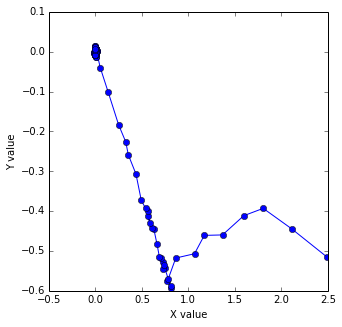

[-0.49225259120044301, -0.15269199951122875, 0.0642906588553422, 0.023967544121802981, 0.06157459893003267]
[0.32431366512490817, 0.24521401135291732, 0.059051240285381508, -0.02162709949387678, -0.014127353210596797]


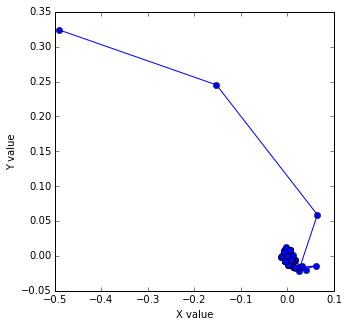

In [7]:
plt.close('all')

def myPlot(myList):
    
    xarray = []
    yarray = []
    
    for i in range(0,len(myList)):
        if i%2 == 0:
            xarray.append(myList[i])
            
        elif i%2 == 1:
            yarray.append(myList[i])
        
    print(xarray[0:5])
    print(yarray[0:5])   
     
    color = ['r','g','b']
    
    rcolor = random.choice(color)
    
    plt.plot(xarray, yarray, rcolor, marker='o')
    plt.xlabel('X value')
    plt.ylabel('Y value')
    plt.show()

    
myPlot(summary0)
myPlot(summary1)

[-0.76356046595200633, -0.66876529954690389, -0.58620613581379555, -0.41856546916406029, -0.44694570721699867]
[-0.80222943965925941, -0.68335791118085398, -0.62051895292558468, -0.55233699527149216, -0.61379890926858605]


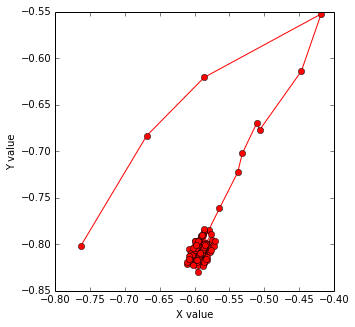

[-1.7490049350607015, -1.4335159166713121, -1.2467297956029366, -1.0726138892108883, -0.92284703987384431]
[-0.9806481746417296, -0.99696996710720553, -0.97252745967802612, -0.92942449241471214, -0.92651080020444365]


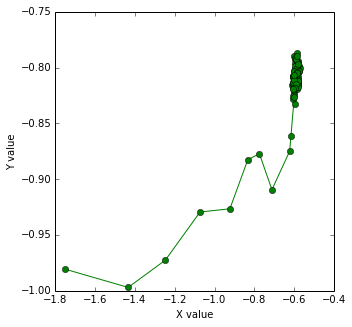

[-0.56773620461634233, -0.21920205552198516, -0.099149017286487673, 0.0096026559190712894, 0.0096314645300775836]
[0.35602839715520063, 0.26410700085877958, 0.1116398969611318, -0.0037656733186470885, -0.011578556996770224]


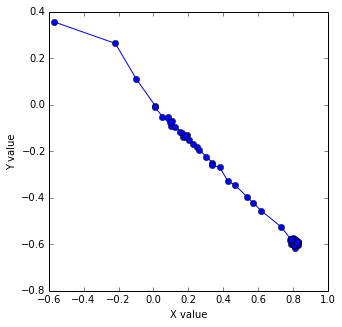

[1.5593100536651139, 1.2437663844238032, 0.99667919519006198, 0.85423290045645472, 0.78991926253723521]
[-1.3738385277717524, -1.186946827642541, -1.0418352714618306, -0.94934928078677316, -0.85519355840967803]


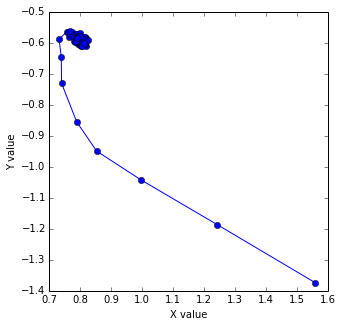

In [8]:
myPlot(summary2)
myPlot(summary3)
myPlot(summary4)
myPlot(summary5)